# MODEL TRAINING

# Importing Libraries and Data

In [40]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#models

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
#metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [6]:
#importing data

df = pd.read_csv(r"data/student_data.csv")

In [7]:
#first 5 rows of dataset

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Dividing data in X and y (features and target)

Maths Score is our target feature and the rest will be our independent features

In [8]:
X = df.drop(columns='math_score')
y = df['math_score']

# One Hot Encoding of Categorical Features and Standardization of Numerical Features

In [9]:
#categorical columns
categorical_features = [feature for feature in X.columns if X[feature].dtype == 'O']

#numerical columns
numerical_features = [feature for feature in X.columns if X[feature].dtype != 'O']

In [10]:
print(numerical_features, "\n", categorical_features)

['reading_score', 'writing_score'] 
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
#importing onehotencoder, standard scaler and column transforemer

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
#creatign pipeline for the data preprocessing

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, categorical_features),
        ("StandardScaler", numeric_transformer, numerical_features)
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

# Train Test Split of data

In [14]:
#importing library

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 14), (200, 14), (800,), (200,))

# Function for model evaluation

In [28]:
def model_evaluation(true, predicted):

    r2 = r2_score(true, predicted)
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    
    rmse = np.sqrt(mse)

    return r2, mse, mae, rmse

# Model training and Selection

In [31]:
#initializing diffrent models

models = {
    "LinearRegression" : LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor(),
    "GradientBoostingRegressor" : GradientBoostingRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "KNeighborsRegressor" : KNeighborsRegressor()

}

model_list = []
r2_list = []

for i in range(len(models)):

    #training model
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    model_list.append(list(models.keys())[i])

    # model metrics for training set
    r2_train, mse_train, mae_train, rmse_train = model_evaluation(y_train, model.predict(X_train))

    # model metrics for testing set
    r2_test, mse_test, mae_test, rmse_test = model_evaluation(y_test, model.predict(X_test))

    #dispalying all the model metrics for train and test sets

    print(list(models.keys())[i], "\n")

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- R2 Score: {:.4f}".format(r2_train))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R2 Score: {:.4f}".format(r2_test))

    #storing test r2 score in a list
    r2_list.append(r2_test)
    
    print('='*35)
    print('\n')


LinearRegression 

Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Ridge 

Model performance for Training set
- Root Mean Squared Error: 5.3235
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3936
- Mean Absolute Error: 4.2125
- R2 Score: 0.8805


Lasso 

Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


DecisionTreeRegressor 

Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------

In [48]:
# r2 test score of all models

r2_data = pd.DataFrame({"model" : model_list, 'r2_test' : r2_list})
r2_data.sort_values(by='r2_test', ascending=False)

,model,r2_test
1,Ridge,0.880451
0,LinearRegression,0.880433
6,GradientBoostingRegressor,0.872543
4,RandomForestRegressor,0.850740
5,AdaBoostRegressor,0.848497
2,Lasso,0.825320
7,XGBRegressor,0.825046
8,KNeighborsRegressor,0.776335
3,DecisionTreeRegressor,0.723122


We will select Linear Regression as our model

# Linear Regression

In [37]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


# PLotting Predicted and actual values

Text(0, 0.5, 'Predicted')

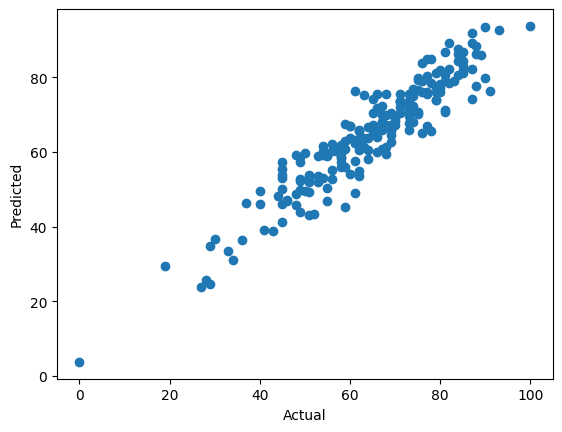

In [39]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

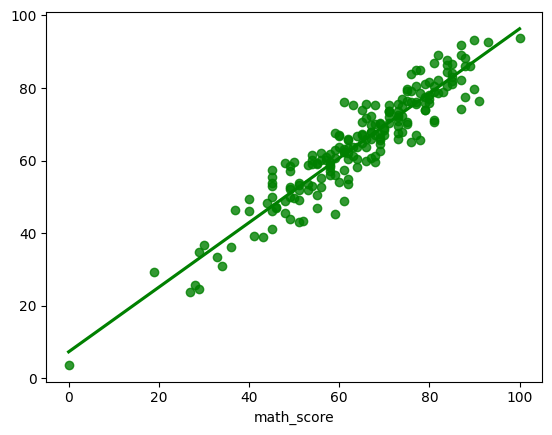

In [44]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');

In [45]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
